In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt

In [4]:
organizations = pd.read_csv('organizations.csv')
pd.set_option('display.max_columns', None)
organizations.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,180418.0,2007-05-25 13:51:27,2022-03-07 05:47:35,NaN,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",3.0,3.975000e+07,3.975000e+07,USD,2005-06-01,2008-05-19,NaN,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,NaN,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,10926.0,2007-05-26 02:30:28,2022-11-30 00:28:26,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,NaN,NaN,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",NaN,NaN,NaN,NaN,1996-03-17,NaN,NaN,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,2.0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,23605.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,digg.com,http://www.digg.com,USA,NY,New York,New York,NaN,NaN,acquired,Digg Inc. operates a website that enables its ...,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",6.0,4.900000e+07,4.900000e+07,USD,2004-10-11,2016-09-13,NaN,51-100,feedback@digg.com,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,51079.0,2007-05-26 03:21:34,2022-07-19 01:45:23,NaN,"investor,company",omidyar.com,http://www.omidyar.com,USA,CA,California,Redwood City,1991 Broadway Suite 200,94063,operating,Omidyar Network is an investment firm.,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",NaN,NaN,NaN,NaN,2004-01-01,NaN,NaN,101-250,info@omidyar.com,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,56.0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,29.0,2007-05-26 04:22:15,2022-08-05 13:19:05,"Meta Platforms, Inc.","investor,company",meta.com,https://meta.com,USA,CA,California,Menlo Park,1 Hacker Way,94025,ipo,Meta is a social technology company that enabl...,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",17.0,2.612282e+10,2.612282e+10,USD,2004-02-04,2022-08-04,NaN,10000+,NaN,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...,Facebook,"Facebook, Inc.",NaN,company,1.0


In [5]:
organizations.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits'],
      dtype='object')

In [30]:
# Select required columns in organizations 
companies = organizations[['uuid', 'name', 'region', 'status', 'category_list', 'category_groups_list', 'founded_on','num_funding_rounds', 'total_funding_usd', 'total_funding', 'employee_count', 'num_exits']]
companies.head()

,uuid,name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,New York,acquired,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01,3.00,39750000.00,39750000.00,51-100,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,California,operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17,NaN,NaN,NaN,10000+,2.00
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,New York,acquired,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",2004-10-11,6.00,49000000.00,49000000.00,51-100,NaN
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,California,operating,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",2004-01-01,NaN,NaN,NaN,101-250,56.00
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,California,ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2004-02-04,17.00,26122817488.00,26122817488.00,10000+,1.00


In [31]:
# Remove NaNs in founding date 

companies = companies.dropna(subset=['founded_on'])

# Convert 'founded_on' to datetime, coercing invalid values to NaT

companies['founded_on'] = pd.to_datetime(companies['founded_on'], errors='coerce')

# Calculate age of the companies

current_year = pd.Timestamp.now().year
companies['age'] = companies['founded_on'].apply(lambda x: current_year - x.year)
companies.head()

,uuid,name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,New York,acquired,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",2005-06-01,3.00,39750000.00,39750000.00,51-100,NaN,18.00
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,California,operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",1996-03-17,NaN,NaN,NaN,10000+,2.00,27.00
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,New York,acquired,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",2004-10-11,6.00,49000000.00,49000000.00,51-100,NaN,19.00
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,California,operating,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",2004-01-01,NaN,NaN,NaN,101-250,56.00,19.00
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,California,ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2004-02-04,17.00,26122817488.00,26122817488.00,10000+,1.00,19.00


In [32]:
# Define your criteria for a startup

young_age = 5  # Companies less than 5 years old
min_funding = 100000  # Companies with at least $100,000 in funding

# Filter the DataFrame based on the criteria

startups = companies[
    (companies['age'] <= young_age) &
    (companies['total_funding_usd'] >= min_funding) &
    (companies['status'] == 'operating') &
    (companies['employee_count'].isin(['51-100', '11-50']))
]

len(startups)

16250

In [9]:
funds = pd.read_csv('funds.csv')
pd.set_option('display.max_columns', None)
funds.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,entity_uuid,entity_name,entity_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code
0,8190b28a-3c78-0ac4-1e7c-f0b5edce4b2e,DFJ Dragon Second Fund,fund,dfj-dragonfund-raised-dfj-dragon-second-fund--...,https://www.crunchbase.com/fund/dfj-dragonfund...,NaN,2008-12-17 03:07:16,2018-02-12 23:51:25,fe743289-a4aa-a470-00d8-bbe937e0955b,DFJ DragonFund,organization,2008-12-16,300000000.0,300000000.0,USD


In [10]:
investments = pd.read_csv('investments.csv')
pd.set_option('display.max_columns', None)
investments.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True


In [11]:
investment_partners = pd.read_csv('investment_partners.csv')
pd.set_option('display.max_columns', None)
investment_partners.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer


In [12]:
funding_rounds = pd.read_csv('funding_rounds.csv')
pd.set_option('display.max_columns', None)
funding_rounds.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,521406.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7


In [13]:
people = pd.read_csv('people.csv')
pd.set_option('display.max_columns', None)
people.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,gender,country_code,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,23265.0,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben,Elowitz,male,USA,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...


In [33]:
# Selecting relevant columns from 'people' dataframe
people_subset = people[['uuid','name', 'gender', 'featured_job_organization_uuid']]

# Merging 'startups' with the subset of 'people' dataframe
startups_merged= startups.merge(people_subset, 
                           left_on='uuid', 
                           right_on='featured_job_organization_uuid', 
                           how='left')
startups_merged.head()

,uuid_x,name_x,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age,uuid_y,name_y,gender,featured_job_organization_uuid
0,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,Servixer LLC,Stockholms Lan,operating,"Information Technology,SEO,Social","Community and Lifestyle,Information Technology...",2018-01-01,2.00,5800000.00,5800000.00,11-50,NaN,5.00,22aa45e7-911b-71bc-ac90-aa6b9becab8a,Abdullah Khalid,male,97a755c0-53fb-1e67-d9a4-fa95e6c5d102
1,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,Servixer LLC,Stockholms Lan,operating,"Information Technology,SEO,Social","Community and Lifestyle,Information Technology...",2018-01-01,2.00,5800000.00,5800000.00,11-50,NaN,5.00,378e80bf-3543-9a77-9df2-692bd0c1153b,Wajahat ALi,male,97a755c0-53fb-1e67-d9a4-fa95e6c5d102
2,5e298e78-0999-fe40-4b90-c21ed1c90786,Fundamento,California,operating,"Human Resources,Software","Administrative Services,Software",2020-10-05,1.00,1200000.00,1200000.00,11-50,NaN,3.00,e5643bd2-07e5-4945-9f1c-ca0b50b22989,Ankit Durga,male,5e298e78-0999-fe40-4b90-c21ed1c90786
3,5e298e78-0999-fe40-4b90-c21ed1c90786,Fundamento,California,operating,"Human Resources,Software","Administrative Services,Software",2020-10-05,1.00,1200000.00,1200000.00,11-50,NaN,3.00,91c9f0a0-2c9f-41d1-9b5d-cf3f67092bc0,Megha Aggarwal,female,5e298e78-0999-fe40-4b90-c21ed1c90786
4,55471401-db75-b747-eb4c-439d8bd55108,Navio Systems,California,operating,"Health Care,Information Technology,mHealth","Health Care,Information Technology,Mobile",2018-01-01,1.00,25400000.00,25400000.00,11-50,NaN,5.00,46b2fff1-6b3c-4578-9074-d47d06b07f5e,Todd Meyerrose,male,55471401-db75-b747-eb4c-439d8bd55108


In [34]:
startups_merged = startups_merged.rename(columns={
    'uuid_x': 'org_id',
    'name_x': 'org_name',
    'name_y': 'founder_name',
    'gender': 'founder_gender',
    'uuid_y': 'founder_id',
})

startups_merged.head(1)

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age,founder_id,founder_name,founder_gender,featured_job_organization_uuid
0,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,Servixer LLC,Stockholms Lan,operating,"Information Technology,SEO,Social","Community and Lifestyle,Information Technology...",2018-01-01,2.00,5800000.00,5800000.00,11-50,NaN,5.00,22aa45e7-911b-71bc-ac90-aa6b9becab8a,Abdullah Khalid,male,97a755c0-53fb-1e67-d9a4-fa95e6c5d102


In [35]:
# Group by 'org_uuid' and sum the 'investor_count'
total_investors = funding_rounds.groupby('org_uuid')['investor_count'].sum().reset_index()

# Merge 'startups_merged' with 'total_investors' on 'org_uuid'
startups_merged = pd.merge(startups_merged, total_investors, left_on='org_id', right_on='org_uuid', how='left')


startups_merged.head(1)

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age,founder_id,founder_name,founder_gender,featured_job_organization_uuid,org_uuid,investor_count
0,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,Servixer LLC,Stockholms Lan,operating,"Information Technology,SEO,Social","Community and Lifestyle,Information Technology...",2018-01-01,2.00,5800000.00,5800000.00,11-50,NaN,5.00,22aa45e7-911b-71bc-ac90-aa6b9becab8a,Abdullah Khalid,male,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,2.00


In [36]:
startups_merged = startups_merged.drop(columns=['featured_job_organization_uuid', 'org_uuid'])


In [18]:
degrees = pd.read_csv('degrees.csv')
pd.set_option('display.max_columns', None)
degrees.head(1)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed
0,205fdfd1-ecac-aa43-262f-219f11755f67,MS Mass Communication @ Boston University,degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:40:03,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,NaN,1992-01-01,True


In [37]:
startups_merged = pd.merge(
    startups_merged,
    degrees[['person_uuid', 'degree_type', 'institution_name', 'is_completed','subject']],
    left_on='founder_id',
    right_on='person_uuid',
    how='left'
)

In [38]:

missing_values = startups_merged.isnull().mean() * 100
missing_values

org_id                  0.00
org_name                0.00
region                  0.56
status                  0.00
category_list           3.14
category_groups_list    3.14
founded_on              0.00
num_funding_rounds      0.00
total_funding_usd       0.00
total_funding           0.00
employee_count          0.00
num_exits              99.81
age                     0.00
founder_id             18.46
founder_name           18.46
founder_gender         21.24
investor_count          0.00
person_uuid            60.36
degree_type            63.28
institution_name       60.36
is_completed           60.36
subject                67.03
dtype: float64

In [39]:
startups_merged.head(1)

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age,founder_id,founder_name,founder_gender,investor_count,person_uuid,degree_type,institution_name,is_completed,subject
0,97a755c0-53fb-1e67-d9a4-fa95e6c5d102,Servixer LLC,Stockholms Lan,operating,"Information Technology,SEO,Social","Community and Lifestyle,Information Technology...",2018-01-01,2.00,5800000.00,5800000.00,11-50,NaN,5.00,22aa45e7-911b-71bc-ac90-aa6b9becab8a,Abdullah Khalid,male,2.00,22aa45e7-911b-71bc-ac90-aa6b9becab8a,BSc,Stockholm University,False,"Business Administration, Finance,"


In [40]:
startups_merged['num_exits'] = startups_merged['num_exits'].fillna(0)


In [41]:
startups_merged = startups_merged.dropna()
missing_values = startups_merged.isnull().mean() * 100
missing_values


org_id                 0.00
org_name               0.00
region                 0.00
status                 0.00
category_list          0.00
category_groups_list   0.00
founded_on             0.00
num_funding_rounds     0.00
total_funding_usd      0.00
total_funding          0.00
employee_count         0.00
num_exits              0.00
age                    0.00
founder_id             0.00
founder_name           0.00
founder_gender         0.00
investor_count         0.00
person_uuid            0.00
degree_type            0.00
institution_name       0.00
is_completed           0.00
subject                0.00
dtype: float64

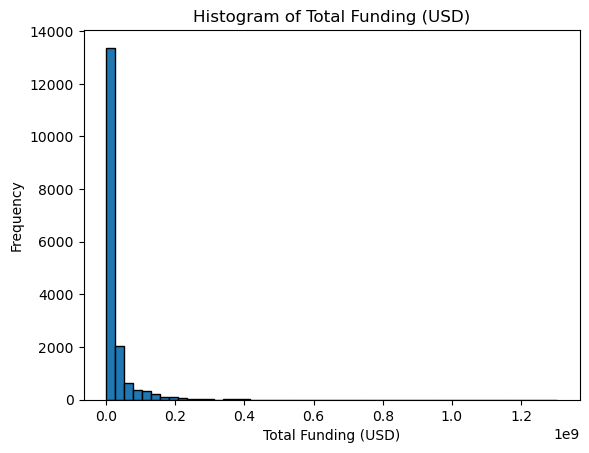

In [25]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
# Assuming df is your DataFrame and total_funding_usd is your column of interest
plt.hist(startups_merged['total_funding_usd'], bins=50, edgecolor='black')

plt.title('Histogram of Total Funding (USD)')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Frequency')

plt.show()

In [42]:
pd.options.display.float_format = '{:.2f}'.format
startups_merged.describe()

,num_funding_rounds,total_funding_usd,total_funding,num_exits,age,investor_count
count,10076.00,10076.00,10076.00,10076.00,10076.00,10076.00
mean,2.70,24849501.28,122173560.29,0.00,3.79,8.40
std,1.77,60738885.69,2734951310.37,0.09,1.11,8.67
min,1.00,100000.00,90000.00,0.00,0.00,0.00
25%,1.00,2225000.00,2350000.00,0.00,3.00,2.00
50%,2.00,7500000.00,8000000.00,0.00,4.00,6.00
75%,3.00,23100000.00,24500598.25,0.00,5.00,12.00
max,23.00,1304000000.00,225099950000.00,3.00,5.00,86.00


In [43]:
# Random sample of 1 % of startups 
sampled_startups_merged = startups_merged.sample(frac=0.1, random_state=1)
len(sampled_startups_merged)

1008

In [401]:
#print(list(sampled_startups_merged['degree_type'].unique()))

In [400]:
#sampled_startups_merged[sampled_startups_merged['degree_category'] == 'Others']

In [44]:
# Categorize degrees 
def categorize_degree(degree):
    degree = degree.lower().split()
    if any(any(keyword in word for keyword in ['bt','ab', 'bm', 'bfin', 'bhs','b tech', 'btech','b tech', 'b.','degree','engin','b.a.','bach','bsc','bse','bachelor','bachelors','bachelor\'s', 'b.a', 'b.s.c','b.sc', 'b.e', 'b.tech', 'bba', 'ba', 'bs', 'b.s', 'beng', 'be', 'b. tech', 'bcom']) for word in degree):
        return 'Bachelor\'s Degree'
    elif any(any(keyword in word for keyword in ['grauate','graduate','m.','m.d.','md','ma', 'ms', 'm.phil','m.e','me','msc', 'msee','m.sc.','master\’s','master', 'm.a', 'm.sc', 'm.tech', 'mba', 'ms', 'm.s', 'meng', 'me', 'm. tech', 'mcom']) for word in degree):
        return 'Master\'s Degree'
    elif any(any(keyword in word for keyword in ['phd', 'ph.d', 'doctor', 'philosophy', 'dr.','post-doc','doctorate']) for word in degree):
        return 'Doctoral Degree'
    elif any(any(keyword in word for keyword in ['jd', 'cfa', 'chartered', 'financial', 'analyst', 'juris']) for word in degree):
        return 'Professional Degree'
    elif any(any(keyword in word for keyword in ['diploma', 'certificate', 'executive']) for word in degree):
        return 'Diploma/Certificate'
    elif any(any(keyword in word for keyword in ['unknown']) for word in degree):
        return 'Unknown'
    else:
        return 'Others'

sampled_startups_merged['degree_category'] = sampled_startups_merged['degree_type'].apply(categorize_degree)

In [45]:
len(sampled_startups_merged[sampled_startups_merged['degree_category'] == 'Others'])

40

In [46]:
sampled_startups_merged.head()

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,total_funding,employee_count,num_exits,age,founder_id,founder_name,founder_gender,investor_count,person_uuid,degree_type,institution_name,is_completed,subject,degree_category
10951,249fad75-d527-4599-bcd5-d8e85cd3bbc8,CHAMPtitles,Ohio,operating,"SaaS,Software",Software,2018-01-01,4.00,31400000.00,31400000.00,51-100,0.00,5.00,ab51f7a7-b7ca-4fe3-a021-b2aad3f2e433,Shane McRann Bigelow,male,21.00,ab51f7a7-b7ca-4fe3-a021-b2aad3f2e433,Bachelor of Business Administration,University of Notre Dame,True,Finance,Bachelor's Degree
29473,f976bb54-cf8b-405a-97b0-700d444bbd1b,Primitives,New York,operating,"Social Network,Web Design","Design,Internet Services",2021-01-01,1.00,4000000.00,4000000.00,11-50,0.00,2.00,960a8d28-78ee-c9d8-b472-fb32553a8c57,David Gabeau,male,4.00,960a8d28-78ee-c9d8-b472-fb32553a8c57,Web Development,Flatiron School,True,Full Stack Web Development,Master's Degree
4828,b5fede7e-feb9-42d2-8a83-3034ba3512b9,PARSIQ,Shetland Islands,operating,"Blockchain,Cryptocurrency,Cyber Security,Fraud...","Financial Services,Information Technology,Inte...",2018-01-01,2.00,3000000.00,3000000.00,11-50,0.00,5.00,115aa360-0fb7-4bcb-b1bc-d847c861453e,Alan Durnev,male,9.00,115aa360-0fb7-4bcb-b1bc-d847c861453e,Bachelor's degree,University of Tartu,True,"Computer Science, Cum Laude",Bachelor's Degree
21597,6dce71f6-292c-4a89-8c3a-87456f574421,CopyCat,Pennsylvania,operating,Software,Software,2020-01-01,2.00,219996.00,219996.00,11-50,0.00,3.00,364e0212-768b-49aa-b466-17611b089874,Paritosh Gupta,male,2.00,364e0212-768b-49aa-b466-17611b089874,Bachelor of Science - BS,Drexel University,True,Computer Science,Bachelor's Degree
605,a81cdc31-3115-42fe-53e2-35d3463e2fea,Perennial,Colorado,operating,"AgTech,Software","Agriculture and Farming,Software",2018-01-01,5.00,24502393.00,24502393.00,11-50,0.00,5.00,613a8b1c-aba3-f84f-b8db-2c028d8f5b91,David Lu,male,10.00,613a8b1c-aba3-f84f-b8db-2c028d8f5b91,BSc,Brown University,False,Chemistry,Bachelor's Degree


In [260]:
#print(list(sampled_startups_merged['subject'].unique()))

In [47]:
#Categorize subject 
def categorize_subject(subject):
    subject = subject.lower().split()
    
    if any(any(keyword in word for keyword in ['consumer','commerce','tax','econometrics','finance', 'accounting', 'investment', 'economics', 'banking', 'financial']) for word in subject):
        return 'Economics/Finance'
    elif any(any(keyword in word for keyword in ['system', 'computation', 'mis','cs', 'it', 'computing','web', 'development', 'programming', 'software', 'computer', 'technology', 'computer', 'information', 'technology', 'network', 'data', 'programming']) for word in subject):
        return 'Computer Science/IT'
    elif any(any(keyword in word for keyword in ['infraestructura tecnológica','chemistry', 'chemical']) for word in subject):
        return 'Chemistry'
    elif any(any(keyword in word for keyword in ['mb&b','managing','enterpreneurial','mba', 'business', 'management', 'administration', 'marketing', 'entrepreneurship']) for word in subject):
        return 'Business/Management'
    elif any(any(keyword in word for keyword in ['geoscience','metallurgy','mech','car','electronic','Geoscience','mechatronics','engineering', 'mechanical', 'electrical', 'civil', 'aerospace', 'industrial', 'materials']) for word in subject):
        return 'Engineering'
    elif any(any(keyword in word for keyword in ['statistical','mathematics', 'math', 'statistics']) for word in subject):
        return 'Mathematics/Statistics'
    elif any(any(keyword in word for keyword in ['nurse','immunology','health','neuroscience','cardiologist', 'pharmacology','bioinformatics','dermatology','medicine', 'biomedical','medical', 'healthcare', 'pharmacy', 'biology', 'genetics', 'biotechnology']) for word in subject):
        return 'Medical/Healthcare'
    elif any(any(keyword in word for keyword in ['government','justice','education','clarient','jurisprudence','latin','comunications','culture','american','foreign', 'leadership','law','public', 'philosophy', 'history', 'journalism','english','art', 'literature', 'music', 'design', 'media', 'communication','social', 'international', 'political', 'sociology', 'psychology']) for word in subject):
        return 'Arts/Humanities'
    elif any(any(keyword in word for keyword in ['physik','pychology', 'psychology', 'physics', 'astronomy', 'cosmology', 'thermodynamics', ]) for word in subject):
        return 'Physics/Astronomy'
    else:
        return 'Other'

sampled_startups_merged['subject_category'] = sampled_startups_merged['subject'].apply(categorize_subject)

In [48]:
len(sampled_startups_merged[sampled_startups_merged['subject_category'] == 'Other'])

63

In [402]:
#sampled_startups_merged[sampled_startups_merged['subject_category'] == 'Other']['subject'].unique()

In [49]:
#sampled_startups_merged['category_list_group'].unique()

In [461]:
#sampled_startups_merged['category_groups_list'].unique()

In [50]:
#Categorie industry
def categorize_industry(industry):
    industry = industry.lower().split(',')
    if any(any(keyword in word for keyword in ['AI', 'machine learning', 'artificial intelligence', 'data and analytics']) for word in industry):
        return 'AI/Data Analytics'
    elif any(any(keyword in word for keyword in ['commerce and shopping', 'consumer goods', 'sales and marketing']) for word in industry):
        return 'Commerce and Shopping'
    elif any(any(keyword in word for keyword in ['design', 'internet services']) for word in industry):
        return 'Design/Internet Services'
    elif any(any(keyword in word for keyword in ['financial', 'fintech', 'fin tech','lending','investments']) for word in industry):
        return 'Financial Services'
    elif any(any(keyword in word for keyword in ['agriculture and farming']) for word in industry):
        return 'Agriculture and Farming'
    elif any(any(keyword in word for keyword in ['health care','lifestyle']) for word in industry):
        return 'Health Care'
    elif any(any(keyword in word for keyword in ['real estate']) for word in industry):
        return 'Real Estate'
    elif any(any(keyword in word for keyword in ['education']) for word in industry):
        return 'Education'
    elif any(any(keyword in word for keyword in ['media and entertainment']) for word in industry):
        return 'Media and Entertainment'
    elif any(any(keyword in word for keyword in ['hardware', 'manufacturing']) for word in industry):
        return 'Hardware/Manufacturing'
    elif any(any(keyword in word for keyword in ['government and military']) for word in industry):
        return 'Government and Military'
    elif any(any(keyword in word for keyword in ['biotechnology']) for word in industry):
        return 'Biotechnology'
    elif any(any(keyword in word for keyword in ['energy', 'sustainability']) for word in industry):
        return 'Energy/Sustainability'
    elif any(any(keyword in word for keyword in ['administration']) for word in industry):
        return 'Administrative Services'
    elif any(any(keyword in word for keyword in ['advertising']) for word in industry):
        return 'Advertising'
    elif any(any(keyword in word for keyword in ['apps', 'mobile']) for word in industry):
        return 'Apps/Mobile'
    elif any(any(keyword in word for keyword in ['navigation and mapping']) for word in industry):
        return 'Navigation and Mapping'
    
    elif any(any(keyword in word for keyword in ['food', 'restaurant']) for word in industry):
        return 'Food'
    
    elif any(any(keyword in word for keyword in ['clothing and apparel']) for word in industry):
        return 'Clothing and Apparel'
    
    elif any(any(keyword in word for keyword in ['software', 'information technology']) for word in industry):
        return 'Software'

    elif any(any(keyword in word for keyword in ['gaming']) for word in industry):
        return 'Gaming'
    elif any(any(keyword in word for keyword in ['natural resources','energy']) for word in industry):
        return 'Energy'
    elif any(any(keyword in word for keyword in ['sports']) for word in industry):
        return 'Sports'
    else:
        return 'Other'

sampled_startups_merged['industry'] = sampled_startups_merged['category_groups_list'].apply(categorize_industry)


In [52]:
#sampled_startups_merged[['category_groups_list', 'industry']]

In [65]:
#sampled_startups_merged = sampled_startups_merged.drop(['total_funding', 'person_uuid'], axis=1)
sampled_startups_merged.head(1)

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,employee_count,num_exits,age,founder_id,founder_name,founder_gender,investor_count,degree_type,institution_name,is_completed,subject,degree_category,subject_category,industry
10951,249fad75-d527-4599-bcd5-d8e85cd3bbc8,CHAMPtitles,Ohio,operating,"SaaS,Software",Software,2018-01-01,4.00,31400000.00,51-100,0.00,5.00,ab51f7a7-b7ca-4fe3-a021-b2aad3f2e433,Shane McRann Bigelow,male,21.00,Bachelor of Business Administration,University of Notre Dame,True,Finance,Bachelor's Degree,Economics/Finance,Software


In [66]:
sampled_startups_merged.describe()

,num_funding_rounds,total_funding_usd,num_exits,age,investor_count
count,1008.00,1008.00,1008.00,1008.00,1008.00
mean,2.66,21890112.82,0.00,3.81,8.24
std,1.68,47755024.84,0.09,1.09,8.57
min,1.00,100000.00,0.00,0.00,0.00
25%,1.00,2060000.00,0.00,3.00,2.00
50%,2.00,6791696.00,0.00,4.00,6.00
75%,3.00,20000000.00,0.00,5.00,12.00
max,12.00,739245791.00,2.00,5.00,86.00


In [68]:
percentile = 0.05  # Consider the top 5% values

# Calculate the threshold value based on the defined percentile
threshold = sampled_startups_merged['total_funding_usd'].quantile(1 - percentile)

# Filter the DataFrame for values in the top 5%
top_values_df = sampled_startups_merged[sampled_startups_merged['total_funding_usd'] >= threshold]

# Print the DataFrame with the top 5% funding values and manually check if it makes sense (I did) 
top_values_df.head()

,org_id,org_name,region,status,category_list,category_groups_list,founded_on,num_funding_rounds,total_funding_usd,employee_count,num_exits,age,founder_id,founder_name,founder_gender,investor_count,degree_type,institution_name,is_completed,subject,degree_category,subject_category,industry
20749,be790fc5-3fb4-48d2-a4fb-c2fc34b4f75b,Alumis,California,operating,"Biotechnology,Health Care,Life Science","Biotechnology,Health Care,Science and Engineering",2021-01-01,2.00,270000000.00,11-50,0.00,2.00,b2b1eb39-2e15-2bed-e8cf-cc08134a1f9b,Ken A Brameld,male,2.00,Phd,Caltech,False,Chemistry,Doctoral Degree,Computer Science/IT,Health Care
18423,70f3a143-e173-4971-b13f-9ebf708e9a2f,Truveta,Washington,operating,"Biotechnology,Health Care,Wellness","Biotechnology,Health Care,Science and Engineering",2020-01-01,3.00,195000000.00,51-100,0.00,3.00,c15a87f4-2153-4823-825e-e6a7c5fb3856,Jay Nanduri,male,17.00,Master of business administration,Wharton School of the University of Pennsylvania,True,General management,Master's Degree,Business/Management,Health Care
14102,64d55951-d362-4fe4-9254-617625b922b3,Forge Biologics,Ohio,operating,"Biotechnology,Medical,Therapeutics","Biotechnology,Health Care,Science and Engineering",2020-01-01,5.00,330000000.00,51-100,0.00,3.00,2fa8c8a5-ddb1-4346-8883-cd152960e29d,Timothy J Miller,male,12.00,Doctor of Philosophy (PhD),Case Western Reserve University,False,Pharmacology/Molecular Biology,Doctoral Degree,Medical/Healthcare,Health Care
19149,82790b84-e1d4-41d6-b28c-d6fb6239178d,Silvr,Ile-de-France,operating,"Financial Services,FinTech",Financial Services,2020-01-01,3.00,152043917.00,11-50,0.00,3.00,76fe8239-56d0-3a4e-c10e-0847e9363741,Gregory Tappero,male,18.00,BS,Macquarie University,True,Computer science,Bachelor's Degree,Computer Science/IT,Financial Services
6070,87df1e04-01dc-4c3a-8651-be6c6169bdee,Sorare,Ile-de-France,operating,"Blockchain,Cryptocurrency,Fantasy Sports,Gamin...","Financial Services,Gaming,Other,Payments,Softw...",2018-12-01,4.00,739245791.00,51-100,0.00,5.00,890cb04c-b7ad-6ec9-292d-d8bc1867897a,Ryan Spoon,male,49.00,BA,Duke University,True,unknown,Bachelor's Degree,Other,Financial Services


In [70]:
sampled_startups_merged['funding_bucket'] = pd.cut(sampled_startups_merged['total_funding_usd'], bins=[0, 2000000, 10000000, 50000000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

In [74]:
#Dataset is ready for multinomial logit
sampled_startups_merged.to_csv('startups_clean_sample_.csv', index=False)